**MOVIE RECOMMENDATION SYSTEM**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving movies.csv to movies.csv


In [ ]:
movie_ids_titles=pd.read_csv("movies.csv")

movie_ids_titles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
movie_ids_titles.shape

(9742, 3)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ratings.csv to ratings.csv


In [ ]:
movie_ids_ratings=pd.read_csv("ratings.csv")

movie_ids_ratings.head()


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
movie_ids_ratings.shape

(100836, 4)

**DATA PRE-PROCESSING**

In [ ]:
movie_ids_titles.drop(['genres'],inplace=True,axis=1)

movie_ids_titles.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [ ]:
movie_ids_ratings.drop(["timestamp"],inplace=True,axis=1)

movie_ids_ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [ ]:
merged_movie_df= pd.merge(movie_ids_ratings, movie_ids_titles, on='movieId')

merged_movie_df.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)


**DATA VISUALIZATION**

In [ ]:
merged_movie_df.groupby('title').describe()

userId                          \
                                           count        mean         std   
title                                                                      
'71 (2014)                                   1.0  610.000000         NaN   
'Hellboy': The Seeds of Creation (2004)      1.0  332.000000         NaN   
'Round Midnight (1986)                       2.0  354.500000   31.819805   
'Salem's Lot (2004)                          1.0  345.000000         NaN   
'Til There Was You (1997)                    2.0  229.000000  164.048773   
...                                          ...         ...         ...   
eXistenZ (1999)                             22.0  389.954545  167.161022   
xXx (2002)                                  24.0  272.916667  174.297576   
xXx: State of the Union (2005)               5.0  386.000000  148.801882   
¡Three Amigos! (1986)                       26.0  279.807692  193.794947   
À nous la liberté (Freedom for Us) (1931)    1.0  527.000000         NaN   

                                                                         \
                                             min     25%    50%     75%   
title                                                                     
'71 (2014)                                 610.0  610.00  610.0  610.00   
'Hellboy': The Seeds of Creation (2004)    332.0  332.00  332.0  332.00   
'Round Midnight (1986)                     332.0  343.25  354.5  365.75   
'Salem's Lot (2004)                        345.0  345.00  345.0  345.00   
'Til There Was You (1997)                  113.0  171.00  229.0  287.00   
...                                          ...     ...    ...     ...   
eXistenZ (1999)                             95.0  278.25  419.5  509.25   
xXx (2002)                                   9.0  131.25  240.5  418.50   
xXx: State of the Union (2005)             232.0  274.00  382.0  432.00   
¡Three Amigos! (1986)                        1.0  101.25  260.5  441.25   
À nous la liberté (Freedom for Us) (1931)  527.0  527.00  527.0  527.00   

                                                 movieId            ...  \
                                             max   count      mean  ...   
title                                                               ...   
'71 (2014)                                 610.0     1.0  117867.0  ...   
'Hellboy': The Seeds of Creation (2004)    332.0     1.0   97757.0  ...   
'Round Midnight (1986)                     377.0     2.0   26564.0  ...   
'Salem's Lot (2004)                        345.0     1.0   27751.0  ...   
'Til There Was You (1997)                  345.0     2.0     779.0  ...   
...                                          ...     ...       ...  ...   
eXistenZ (1999)                            608.0    22.0    2600.0  ...   
xXx (2002)                                 610.0    24.0    5507.0  ...   
xXx: State of the Union (2005)             610.0     5.0   33158.0  ...   
¡Three Amigos! (1986)                      599.0    26.0    2478.0  ...   
À nous la liberté (Freedom for Us) (1931)  527.0     1.0    5560.0  ...   

                                                              rating  \
                                                75%       max  count   
title                                                                  
'71 (2014)                                 117867.0  117867.0    1.0   
'Hellboy': The Seeds of Creation (2004)     97757.0   97757.0    1.0   
'Round Midnight (1986)                      26564.0   26564.0    2.0   
'Salem's Lot (2004)                         27751.0   27751.0    1.0   
'Til There Was You (1997)                     779.0     779.0    2.0   
...                                             ...       ...    ...   
eXistenZ (1999)                              2600.0    2600.0   22.0   
xXx (2002)                                   5507.0    5507.0   24.0   
xXx: State of the Union (2005)              33158.0   33158.0    5.0   
¡Three Amig

**MEAN OF RATINGS OF MOVIES**

In [ ]:
merged_movie_df.groupby('title')['rating'].mean().head()

title
'71 (2014)                                 4.0
'Hellboy': The Seeds of Creation (2004)    4.0
'Round Midnight (1986)                     3.5
'Salem's Lot (2004)                        5.0
'Til There Was You (1997)                  4.0
Name: rating, dtype: float64

In [ ]:
merged_movie_df.groupby('title')['rating'].mean().head(50)

title
'71 (2014)                                                4.000000
'Hellboy': The Seeds of Creation (2004)                   4.000000
'Round Midnight (1986)                                    3.500000
'Salem's Lot (2004)                                       5.000000
'Til There Was You (1997)                                 4.000000
'Tis the Season for Love (2015)                           1.500000
'burbs, The (1989)                                        3.176471
'night Mother (1986)                                      3.000000
(500) Days of Summer (2009)                               3.666667
*batteries not included (1987)                            3.285714
...All the Marbles (1981)                                 2.000000
...And Justice for All (1979)                             3.166667
00 Schneider - Jagd auf Nihil Baxter (1994)               4.500000
1-900 (06) (1994)                                         4.000000
10 (1979)                                               

In [ ]:
merged_movie_df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Gena the Crocodile (1969)              5.0
True Stories (1986)                    5.0
Cosmic Scrat-tastrophe (2015)          5.0
Love and Pigeons (1985)                5.0
Red Sorghum (Hong gao liang) (1987)    5.0
Name: rating, dtype: float64

In [ ]:
merged_movie_df.groupby('title')['rating'].mean().sort_values(ascending=False).head(50)

title
Gena the Crocodile (1969)                                             5.0
True Stories (1986)                                                   5.0
Cosmic Scrat-tastrophe (2015)                                         5.0
Love and Pigeons (1985)                                               5.0
Red Sorghum (Hong gao liang) (1987)                                   5.0
Thin Line Between Love and Hate, A (1996)                             5.0
Lesson Faust (1994)                                                   5.0
Eva (2011)                                                            5.0
Who Killed Chea Vichea? (2010)                                        5.0
Siam Sunset (1999)                                                    5.0
Ex Drummer (2007)                                                     5.0
Reform School Girls (1986)                                            5.0
Buzzard (2015)                                                        5.0
Hellbenders (2012)              

**NO. OF RATINGS**

In [ ]:
merged_movie_df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [ ]:
merged_movie_df.groupby('title')['rating'].count().sort_values(ascending=False).head(50)

title
Forrest Gump (1994)                                                               329
Shawshank Redemption, The (1994)                                                  317
Pulp Fiction (1994)                                                               307
Silence of the Lambs, The (1991)                                                  279
Matrix, The (1999)                                                                278
Star Wars: Episode IV - A New Hope (1977)                                         251
Jurassic Park (1993)                                                              238
Braveheart (1995)                                                                 237
Terminator 2: Judgment Day (1991)                                                 224
Schindler's List (1993)                                                           220
Fight Club (1999)                                                                 218
Toy Story (1995)                                

In [ ]:
movie_rating_mean_count= pd.DataFrame(columns=['rating_mean','rating_count'])

movie_rating_mean_count["rating_mean"]=merged_movie_df.groupby('title')['rating'].mean()

movie_rating_mean_count["rating_count"]=merged_movie_df.groupby('title')['rating'].count()

movie_rating_mean_count.head()

,rating_mean,rating_count
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


<Axes: >

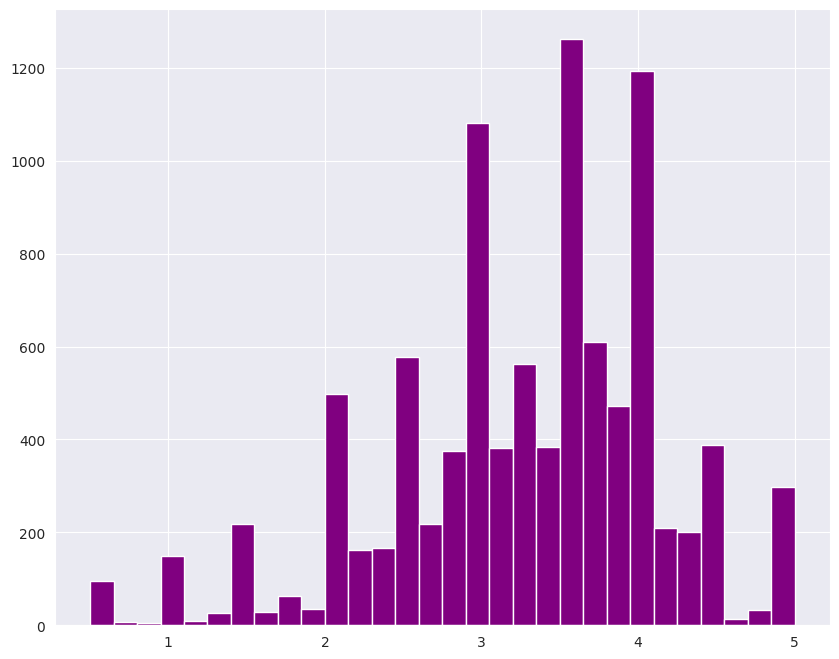

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")

movie_rating_mean_count['rating_mean'].hist(bins=30, color='purple')

<Axes: >

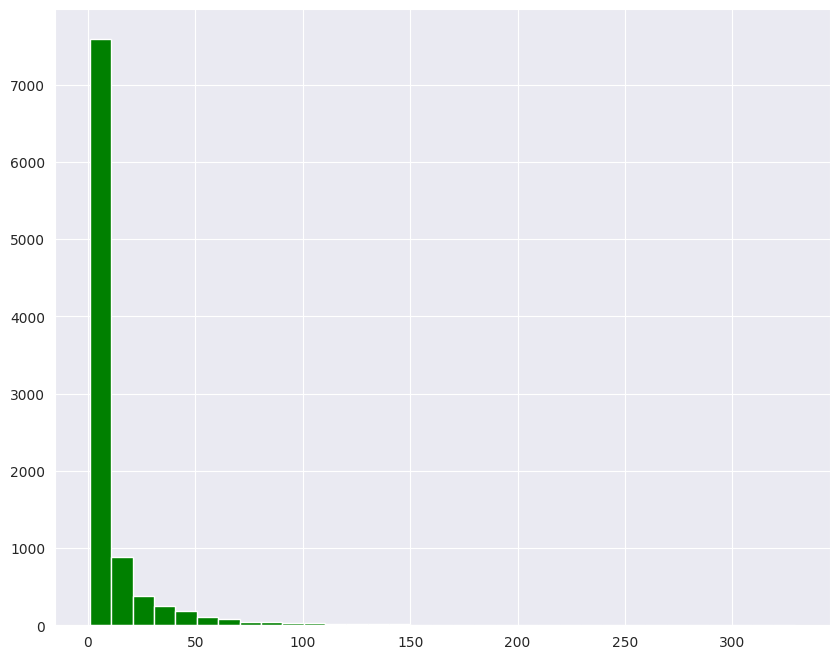

In [ ]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")

movie_rating_mean_count["rating_count"].hist(bins=33, color="green")

**MOVIE RECOMMENDATION BASED ON RATING GIVEN BY THE USER**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data and create the 'movie_rating_mean_count' DataFrame (previous code)

while True:
    print("\nMenu:")
    print("1. Get movie suggestions based on rating")
    print("2. Quit")

    choice = input("Enter your choice (1/2): ")

    if choice == '1':
        try:
            user_rating = float(input("Enter a rating to get movie suggestions: "))
            suggested_movies = movie_rating_mean_count[movie_rating_mean_count['rating_mean'] == user_rating]
            if suggested_movies.empty:
                print("No movies found with a rating of", user_rating)
            else:
                print("Suggested movies with a rating of", user_rating, "are:")
                print(suggested_movies[['rating_mean', 'rating_count']])
        except ValueError:
            print("Invalid input. Please enter a valid rating.")
    elif choice == '2':
        print("Goodbye!")
        break
    else:
        print("Invalid choice. Please enter 1 or 2.")










Menu:
1. Get movie suggestions based on rating
2. Quit
Enter your choice (1/2): 1
Enter a rating to get movie suggestions: 4
Suggested movies with a rating of 4.0 are:
                                                    rating_mean  rating_count
title                                                                        
'71 (2014)                                                  4.0             1
'Hellboy': The Seeds of Creation (2004)                     4.0             1
'Til There Was You (1997)                                   4.0             2
1-900 (06) (1994)                                           4.0             1
10th Victim, The (La decima vittima) (1965)                 4.0             1
...                                                         ...           ...
Zelary (2003)                                               4.0             1
Zelig (1983)                                                4.0             7
Zero de conduite (Zero for Conduct) (Zéro de co... 

**MOVIE RECOMMENDATION BASED ON A PARTICULAR WORD SEARCHED**

In [ ]:
first_letter = input("Enter the first letter to get movie suggestions: ")
suggested_movies = movie_ids_titles[movie_ids_titles['title'].str.lower().str.startswith(first_letter.lower())]
if suggested_movies.empty:
    print("No movies found starting with the letter", first_letter)
else:
    print("Suggested movies starting with the letter", first_letter, "are:")
    print(suggested_movies[['title']])

Enter the first letter to get movie suggestions: the
Suggested movies starting with the letter the are:
                                      title
537                     Theodore Rex (1995)
1236            The Devil's Advocate (1997)
1342                The Players Club (1998)
1404    There's Something About Mary (1998)
1700                           Them! (1954)
...                                     ...
9679    The Tale of the Bunny Picnic (1986)
9684                     The Clapper (2018)
9689         The Cloverfield Paradox (2018)
9717  The Man Who Killed Don Quixote (2018)
9724               The Darkest Minds (2018)

[260 rows x 1 columns]
